In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error

In [20]:
data = pd.read_csv('loanprediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [21]:
# Select the numerical columns for K-means
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
data_numerical = data[numerical_columns]

In [22]:
# Fill missing values with 0 (you may choose a different strategy for missing values)
data_numerical = data_numerical.fillna(0)

In [23]:
# Standardize the numerical data (important for K-means)
scaler = StandardScaler()
data_numerical_scaled = scaler.fit_transform(data_numerical)


In [24]:
# Perform K-means clustering with a specified number of clusters (e.g., 2)
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_numerical_scaled)

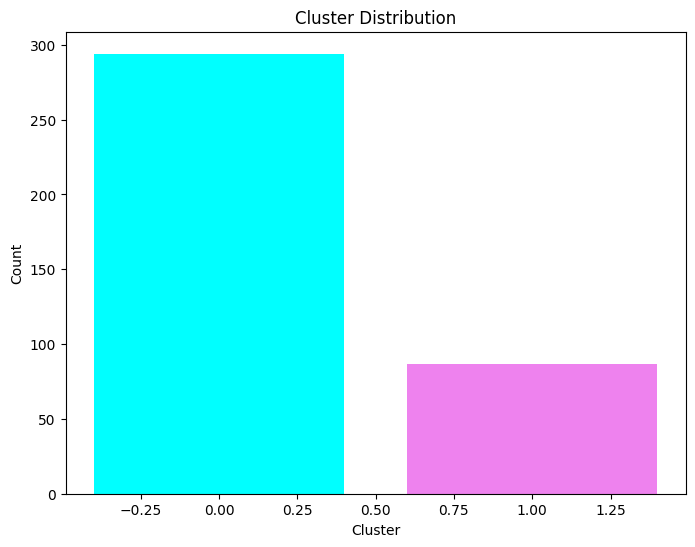

In [25]:
# Create a bar graph to visualize the cluster distribution
cluster_counts = data['Cluster'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color=['cyan', 'violet'])
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.show()

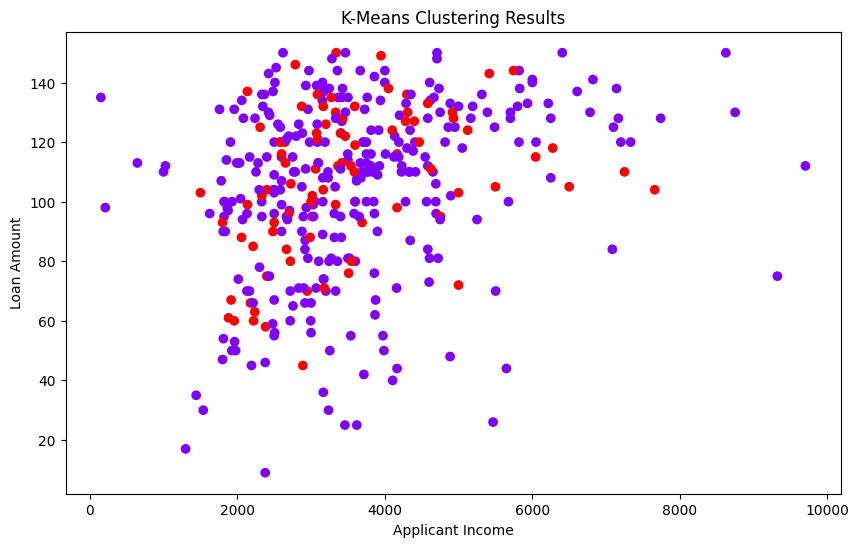

In [26]:
# Create a scatter plot for visualization (not recommended for classification data)
plt.figure(figsize=(10, 6))
plt.scatter(data['ApplicantIncome'], data['LoanAmount'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('K-Means Clustering Results')
plt.show()